Import necessary libraries, initialize a pandas dataframe with the fish_data, and observe the features and potential preprocessing paths

In [29]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import sklearn

In [30]:
data = pd.read_csv("fish_data.csv")

In [31]:
data

,id,average_length(inches)),average_weight(inches)),habitat,ph_of_water,color,Gender,life_span
0,1,14.69,5.87,ponds,6.2,Reddish_Orange,False,10.9
1,2,1.32,3.86,idlewater,6.8,Calico,True,5.2
2,3,14.23,12.09,lakes,7.9,Reddish_Orange,True,25.3
3,4,2.54,3.20,rivers,6.7,White,False,16.4
4,5,13.10,9.81,lakes,7.8,Orange,True,3.2
...,...,...,...,...,...,...,...,...
1995,1996,16.12,6.46,ponds,8.0,Red_and_White_Bi_Color,NaN,6.4
1996,1997,7.50,7.07,rivers,6.3,Black_and_Orange,True,14.0
1997,1998,10.52,3.27,slowmovingwaters,6.1,Orange,True,13.1
1998,1999,7.70,15.41,ponds,7.8,Orange,False,15.6


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2000 non-null   int64  
 1   average_length(inches))  2000 non-null   float64
 2   average_weight(inches))  2000 non-null   float64
 3   habitat                  2000 non-null   object 
 4   ph_of_water              2000 non-null   float64
 5   color                    2000 non-null   object 
 6   Gender                   1976 non-null   object 
 7   life_span                2000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 125.1+ KB


Notice the null values for the gender feature; I opted to just drop this data completely. We then create the training set and testing set. I use the convention of allocating 20% of our data to test set.

In [33]:
data = data.dropna()

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1976 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1976 non-null   int64  
 1   average_length(inches))  1976 non-null   float64
 2   average_weight(inches))  1976 non-null   float64
 3   habitat                  1976 non-null   object 
 4   ph_of_water              1976 non-null   float64
 5   color                    1976 non-null   object 
 6   Gender                   1976 non-null   object 
 7   life_span                1976 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 138.9+ KB


In [35]:
from sklearn.model_selection import train_test_split
X = data.drop(['life_span'], axis = 1)
X = X.rename(columns = {"average_weight(inches))" : "average_weight(ounces))"})
y = data["life_span"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [37]:
train_set = X_train.join(y_train)
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1580 entries, 559 to 1380
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1580 non-null   int64  
 1   average_length(inches))  1580 non-null   float64
 2   average_weight(ounces))  1580 non-null   float64
 3   habitat                  1580 non-null   object 
 4   ph_of_water              1580 non-null   float64
 5   color                    1580 non-null   object 
 6   Gender                   1580 non-null   object 
 7   life_span                1580 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 175.6+ KB


Ignoring the object types, create a heatmap of our training set to see what features correlate with the lifespan. In this case, we can observe that there is low correlation for all the features. This  that there is not necessarily not a linear association with any one feature to the life_span. 

<Axes: >

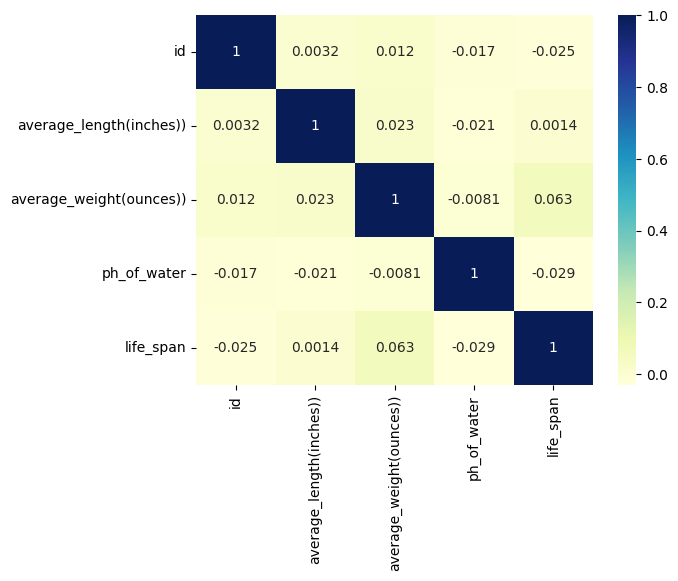

In [38]:
sns.heatmap(train_set[['id', 'average_length(inches))', 'average_weight(ounces))', "ph_of_water", "life_span"]].corr(), annot = True, cmap = "YlGnBu")

Observe the train_set histogram: we see a relatively equal distribution.
We could pursue an np.log function on our features, but it will actually cause more skewed data.

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'average_length(inches))'}>],
       [<Axes: title={'center': 'average_weight(ounces))'}>,
        <Axes: title={'center': 'ph_of_water'}>],
       [<Axes: title={'center': 'life_span'}>, <Axes: >]], dtype=object)

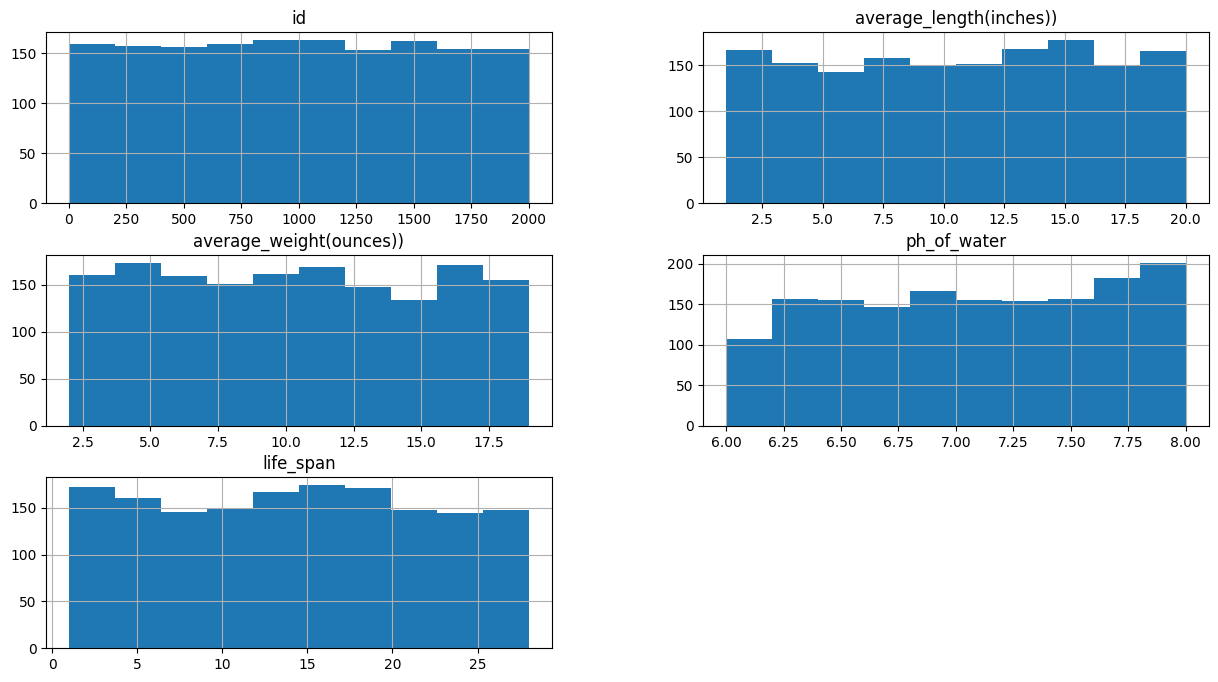

In [39]:
train_set[['id', 'average_length(inches))', 'average_weight(ounces))', "ph_of_water", "life_span"]].hist(figsize = (15,8))

In [40]:
train_set = train_set.join(pd.get_dummies(train_set.habitat, dtype = 'int')).drop(['habitat'], axis = 1)
train_set = train_set.join(pd.get_dummies(train_set.color, dtype = 'int')).drop(['color'], axis = 1)
train_set = train_set.join(pd.get_dummies(train_set.Gender, dtype = 'int')).drop(['Gender'], axis = 1)

In [41]:
train_set = train_set.rename(columns = {True : "Male", False : "Female"})

In [42]:
train_set

,id,average_length(inches)),average_weight(ounces)),ph_of_water,life_span,idlewater,lakes,ponds,rivers,slowmovingwaters,...,Calico,Green_and_Chocolate,Orange,Red_and_Silver,Red_and_White_Bi_Color,Reddish_Orange,White,Yellow,Female,Male
559,560,1.30,8.27,7.3,27.9,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1304,1305,3.67,9.66,6.8,26.1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1086,1087,9.45,6.57,6.1,9.8,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1659,1660,9.40,8.04,6.3,6.2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1307,1308,14.91,3.02,8.0,21.9,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,492,14.26,15.43,6.1,17.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
978,979,19.02,15.40,6.5,25.5,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
930,931,4.07,6.85,6.8,24.2,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
886,887,8.05,3.53,8.0,16.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
